<a href="https://colab.research.google.com/github/kelvin445/Data-Science/blob/main/Manufacturing_Equipment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
condition = pd.read_csv('/content/Manufacturing Equipment.csv')
condition.head(20)

,Tool wear [min],Rotational speed [rpm]
0,0,1551
1,3,1408
2,5,1498
3,7,1433
4,9,1408
5,11,1425
6,14,1558
7,16,1527
8,18,1667
9,21,1741


In [ ]:
condition['Rotational speed [rpm]'].replace(1,400)

0       1551
1       1408
2       1498
3       1433
4       1408
        ... 
9995    1604
9996    1632
9997    1645
9998    1408
9999    1500
Name: Rotational speed [rpm], Length: 10000, dtype: int64

In [ ]:
duplicatespeed = condition[condition['Tool wear [min]'].duplicated()]
duplicatetool= condition[condition['Rotational speed [rpm]'].duplicated()]
print(duplicatetool)
print(duplicatespeed)

      Tool wear [min]  Rotational speed [rpm]
4                   9                    1408
30                 86                    1339
36                101                    1581
37                104                    1439
42                117                    1368
...               ...                     ...
9995               14                    1604
9996               17                    1632
9997               22                    1645
9998               25                    1408
9999               30                    1500

[9059 rows x 2 columns]
      Tool wear [min]  Rotational speed [rpm]
78                  0                    1398
81                  9                    1450
82                 11                    1453
92                 37                    1727
93                 40                    1450
...               ...                     ...
9995               14                    1604
9996               17                    1632
9997     

In [ ]:
unique_values = condition.value_counts()
print(unique_values)

Tool wear [min]  Rotational speed [rpm]
24               1533                      3
32               1436                      3
114              1588                      3
185              1447                      3
106              1438                      3
                                          ..
74               1575                      1
                 1584                      1
                 1589                      1
                 1597                      1
253              1454                      1
Length: 9523, dtype: int64


In [ ]:
null = condition.isnull().sum()
print(null)

Tool wear [min]           0
Rotational speed [rpm]    0
dtype: int64


In [ ]:
summary = condition.describe()
print(condition.info())
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Tool wear [min]         10000 non-null  int64
 1   Rotational speed [rpm]  10000 non-null  int64
dtypes: int64(2)
memory usage: 156.4 KB
None
       Tool wear [min]  Rotational speed [rpm]
count     10000.000000            10000.000000
mean        107.951000             1538.776100
std          63.654147              179.284096
min           0.000000             1168.000000
25%          53.000000             1423.000000
50%         108.000000             1503.000000
75%         162.000000             1612.000000
max         253.000000             2886.000000


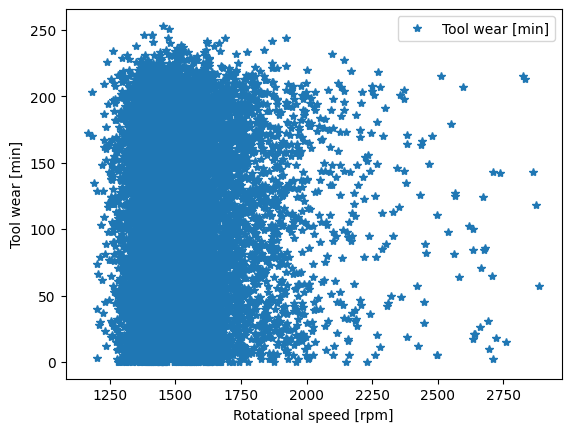

In [ ]:
variables = condition.loc[:,['Tool wear [min]','Rotational speed [rpm]']]
condition.plot(x='Rotational speed [rpm]',y='Tool wear [min]',style='*')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Tool wear [min]')
plt.show()

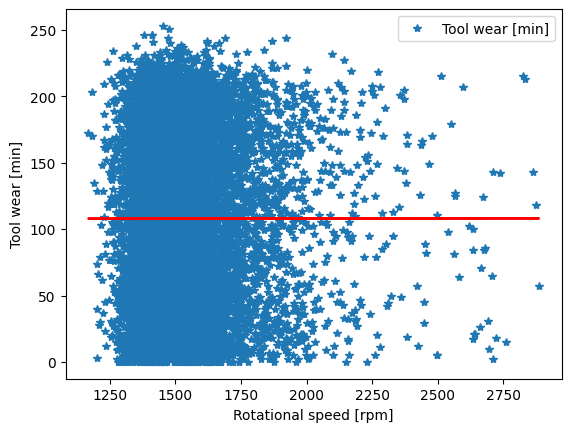

,Tool wear [min],Rotational speed [rpm]
0,0,1551
1,3,1408
2,5,1498
3,7,1433
4,9,1408


In [ ]:
regressor = LinearRegression()
X = condition[['Rotational speed [rpm]']]
y = condition[['Tool wear [min]']]
regressor.fit(X,y)
condition.plot(x='Rotational speed [rpm]',y='Tool wear [min]',style='*')
plt.plot(X, regressor.predict(X), color='red', label='Regression line')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Tool wear [min]')
plt.show()
condition.head(5)

In [ ]:
x = pd.DataFrame(condition['Rotational speed [rpm]'])
y = pd.DataFrame(condition['Tool wear [min]'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(x_test)
print(y_pred)
y_test


(8000, 1)
(2000, 1)
(8000, 1)
(2000, 1)
[110.64580614]
[[-0.00179033]]
[[107.84394466]
 [108.10175173]
 [108.03909029]
 ...
 [108.07668715]
 [107.66133133]
 [107.77591225]]


,Tool wear [min]
9953,119
3850,182
4962,160
3886,51
5437,82
...,...
3919,142
162,0
7903,134
2242,199


In [ ]:
#Evaluation
from sklearn import metrics
import numpy as np
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MAE", mae)
print("MSE", mse)
print("RMSE", rmse)

MAE 54.056020665580824
MSE 3937.5006928097832
RMSE 62.74950751049592


In [ ]:
#Save the model
import joblib
import pickle
#train the model
model = LinearRegression()
model.fit(x,y)
joblib.dump(model, 'Manufacturing Equipment.pkl')
with open('Manufacturing Equipment.pkl', 'wb') as file:
  pickle.dump(model, file)

In [ ]:
import joblib
new_x = np.array([5,15,25,35,45]).reshape(-1,1)
model = joblib.load('Manufacturing Equipment.pkl')
predictions = model.predict(new_x)
new_data=pd.DataFrame({'x':new_x.flatten(), 'Predicted_y': predictions.flatten()})
print(new_data)

    x  Predicted_y
0   5   107.829517
1  15   107.830309
2  25   107.831101
3  35   107.831893
4  45   107.832685


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
